# Chapter9 例題
資工二 111210520 吳佳泰


## Q1.擷取網頁原物料商品行情表格資料
以read_html方法擷取網頁原物料商品行情表格資料，並移除前 2 列資料，然後重新設定行、列標題。

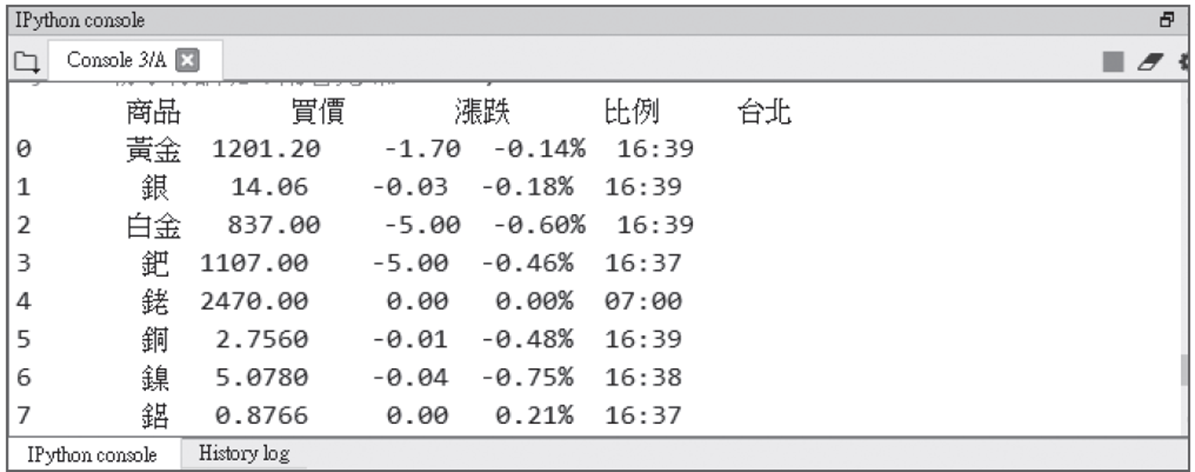

In [22]:
import pandas 

table = pandas.read_html("https://www.stockq.org/market/commodity.php")
table = table[9]
table = table.drop(table.index[[0,1]])
table.columns = ["商品" , "買賣" , "漲跌" , "比例" , "台北"]
table.index = range(0 , len(table))

print(table)

         商品        買賣        漲跌      比例     台北
0   黃金 (盎司)    2625.7     13.80   0.53%  00:54
1    銀 (盎司)    31.230      3.55   1.14%  00:54
2   白金 (盎司)       980      5.00   0.52%  00:53
3    鈀 (盎司)      1055     22.00   2.22%  00:53
4         銠      4950      0.00   0.00%  11/19
5     銅 (磅)    4.1237    0.0157   0.38%  11/19
6         鎳    7.2071    0.0730   1.02%  11/19
7         鋁    1.1954    0.0107   0.90%  11/19
8         鋅    1.3376   -0.0054  -0.41%  11/19
9         鉛    0.9079    0.0029   0.33%  11/19
10        錫     29023  281.0000   0.98%  11/18
11        鐵    101.76    0.1300   0.13%  11/18
12        鋰     78750  300.0000   0.38%  11/19
13        鈦     43.50    0.0000   0.00%  11/19
14        鋼   3339.00   51.0000   1.55%  11/19
15     HRC鋼    686.04   -4.9642  -0.72%  11/19
16     黃金期貨    2629.4      14.8   0.57%  00:40
17      銀期貨    31.247     0.023   0.07%  00:39
18      銅期貨    4.1348    0.0148   0.36%  00:39
19    倫敦銅期貨   9097.00      0.00   0.00%  05:39
20    倫敦鋁期貨  

---

## Q2.繪製學生成績線形圖
以DataFrame 資料繪製線形統計圖。

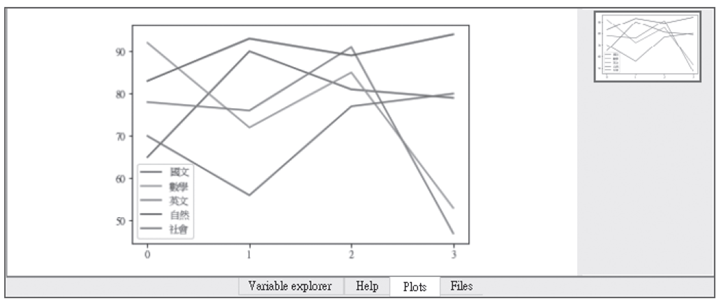

<Axes: >

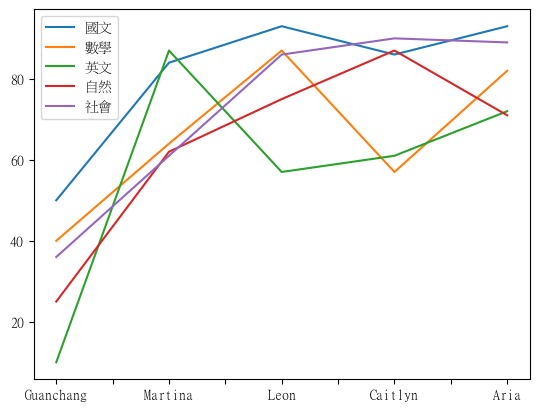

In [23]:
import pandas
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "mingliu"
plt.rcParams["axes.unicode_minus"] = False

students = ["Guanchang" , "Martina" , "Leon" , "Caitlyn" , "Aria"]
grades = [[50, 40, 10, 25, 36] , [84, 64, 87, 62, 61] , [93, 87, 57, 75, 86] , [86, 57, 61, 87, 90] , [93, 82, 72, 71, 89]]
subjects = ["國文" , "數學" , "英文" , "自然" , "社會"]

df = pandas.DataFrame(data=grades , columns=subjects , index=students)
df.plot()

---

## Q3.PM2.5 即時監測顯示器
撰寫即時監測 PM2.5 資料的應用程式，直接使用開放平台資料，隨時都可取得最新監測資料。

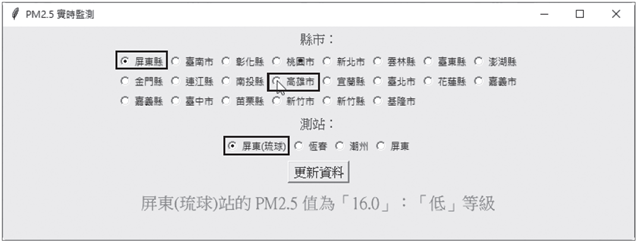
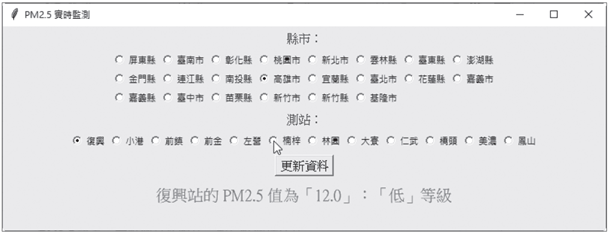
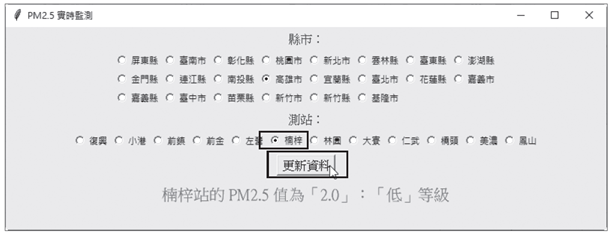

In [11]:
import pandas
import tkinter 

table = pandas.read_csv("https://data.moenv.gov.tw/api/v2/aqx_p_432?language=zh&format=csv&offset=0&limit=100&api_key=434207d8-d408-46b8-9784-5a6241739a9c")
citys = list(table["county"].unique())

win = tkinter.Tk()
win.geometry("800x300")
win.title("PM2.5 實時監測")

towns = []
towns_radio = []

def click1():
    global towns, towns_radio
    towns.clear()
    for i in towns_radio:
        i.destroy()
    towns_radio.clear()

    for n, i in enumerate(table["county"]):
        if i == var1.get():
            temp3 = table.iloc[n, 0]
            if temp3 not in towns:
                towns.append(temp3)
    towns_create()

def click2():
    for n, i in enumerate(table.iloc[:, 0]):
        if i == var2.get():
            pm25 = table.iloc[n, 2]
            if str(pm25).isdigit():
                pm25 = int(pm25)
                if pm25 <= 35:
                    outcome = "低"
                elif pm25 <= 53:
                    outcome = "中"
                elif pm25 <= 70:
                    outcome = "高"
                else:
                    outcome = "非常高"
                textvar1.set(f"{i}站的 PM2.5 值為 「{pm25}」 : 「{outcome}」等級")
            else:
                textvar1.set(f"{i}站的 PM2.5 值目前無資料")
            break

def click3():
    global table, citys, towns, towns_radio
    table = pandas.read_csv("https://data.moenv.gov.tw/api/v2/aqx_p_432?language=zh&format=csv&offset=0&limit=100&api_key=434207d8-d408-46b8-9784-5a6241739a9c")
    citys = list(table["county"].unique())
    towns.clear()

    for i in towns_radio:
        i.destroy()

    click2()
    

def towns_create():
    global towns, towns_radio
    for i in towns:
        radiobutton2 = tkinter.Radiobutton(frame2, text=i, variable=var2, value=i, padx=5, command=click2)
        towns_radio.append(radiobutton2)
        radiobutton2.pack(side="left")
    if towns:
        var2.set(towns[0])  

label1 = tkinter.Label(win, text="縣市 :", padx=6, font=("標楷體", 12))
label1.pack()

frame1 = tkinter.Frame(win)
frame1.pack()
var1 = tkinter.StringVar()
for i, temp2 in enumerate(citys):
    radiobutton1 = tkinter.Radiobutton(frame1, text=temp2, variable=var1, value=temp2, command=click1)
    radiobutton1.grid(row=i // 8, column=i % 8, padx=5, pady=5)
    if i == 0:
        radiobutton1.select()

label2 = tkinter.Label(win, text="\n測站 :", padx=6, font=("標楷體", 12))
label2.pack()

frame2 = tkinter.Frame(win)
frame2.pack()
var2 = tkinter.StringVar()

button1 = tkinter.Button(win, text="更新資料", font=("標楷體", 12), command=click3)
button1.pack(pady=20)

textvar1 = tkinter.StringVar()
label3 = tkinter.Label(win, textvariable=textvar1, font=("標楷體", 16))
label3.pack()

click2()  
win.mainloop()
